1. Reading and Undertanding the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_df = pd.read_csv('Data\TRAIN.csv')

In [3]:
sales_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
sales_df.shape

(188340, 10)

In [5]:
sales_df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


2. Visualising the Data

<Figure size 864x864 with 0 Axes>

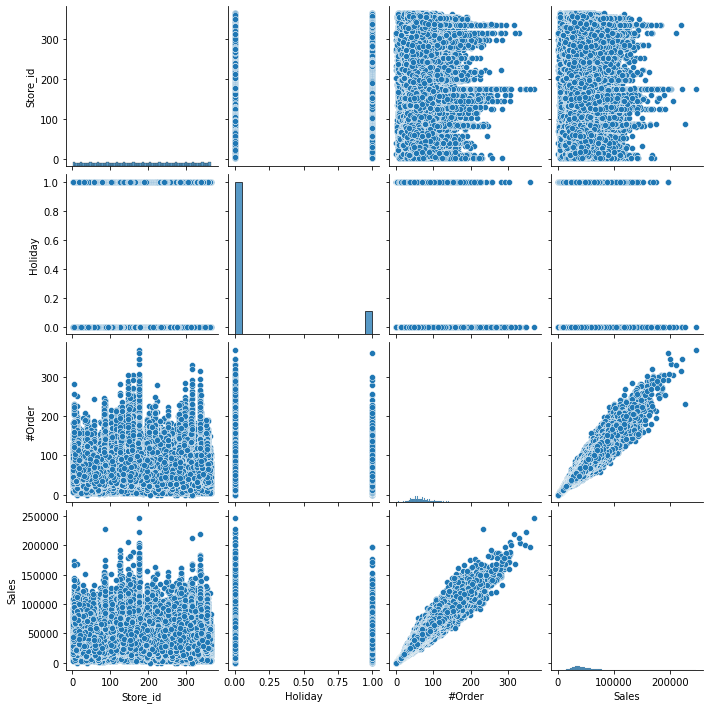

In [6]:
plt.figure(figsize=(12,12))
sns.pairplot(sales_df)
plt.show()

In [7]:
sales_df['Date'].dtype

dtype('O')

In [8]:
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df['Date'].dtype


dtype('<M8[ns]')

In [9]:
sales_df['Day'] = sales_df['Date'].dt.day
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Year'] = sales_df['Date'].dt.year


In [10]:
sales_df['Weekend'] = ((sales_df['Date'].dt.dayofweek) > 5).astype(int)

In [11]:
sales_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Day,Month,Year,Weekend
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,1,1,2018,0
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,1,1,2018,0
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,1,1,2018,0
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,1,1,2018,0
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,1,1,2018,0


In [12]:
sales_df.describe()

,Store_id,Holiday,#Order,Sales,Day,Month,Year,Weekend
count,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982,15.691860,5.498062,2018.292636,0.141473
std,105.366308,0.338256,30.467415,18456.708302,8.783156,3.399450,0.454974,0.348510
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000,8.000000,3.000000,2018.000000,0.000000
50%,183.000000,0.000000,63.000000,39678.000000,16.000000,5.000000,2018.000000,0.000000
75%,274.000000,0.000000,82.000000,51909.000000,23.000000,8.000000,2019.000000,0.000000
max,365.000000,1.000000,371.000000,247215.000000,31.000000,12.000000,2019.000000,1.000000


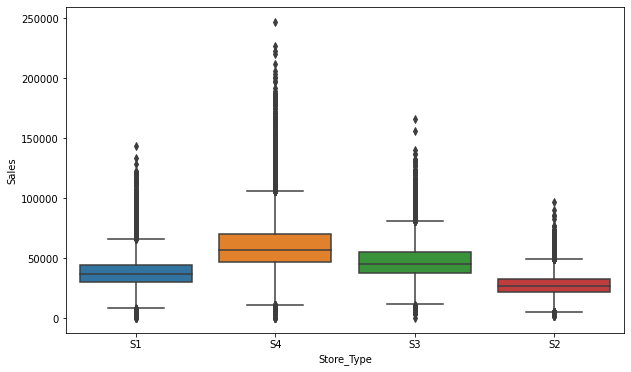

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Store_Type',y='Sales',data=sales_df)
plt.show()

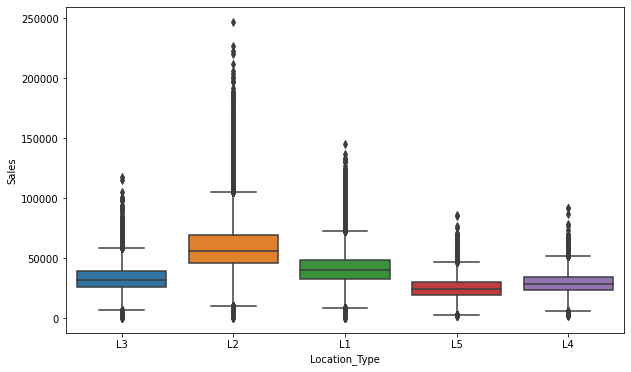

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Location_Type',y='Sales',data=sales_df)
plt.show()

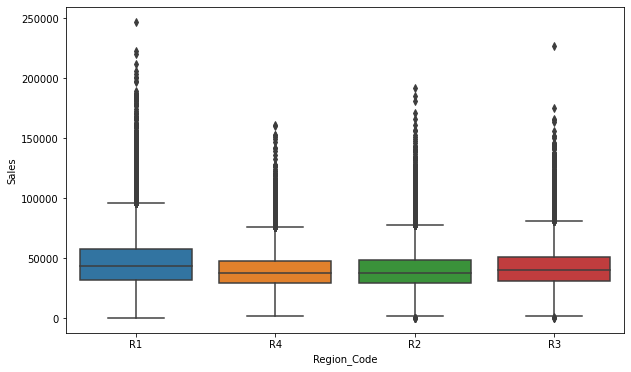

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region_Code',y='Sales',data=sales_df)
plt.show()

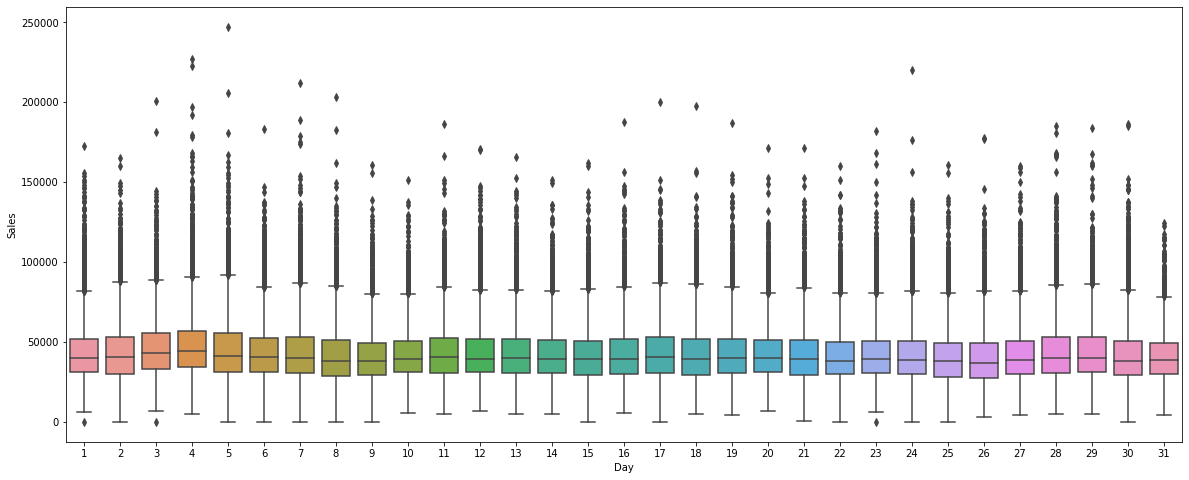

In [16]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Day',y='Sales',data=sales_df)
plt.show()

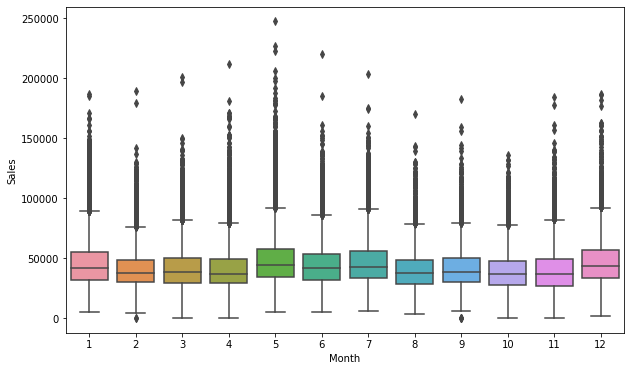

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Month',y='Sales',data=sales_df)
plt.show()

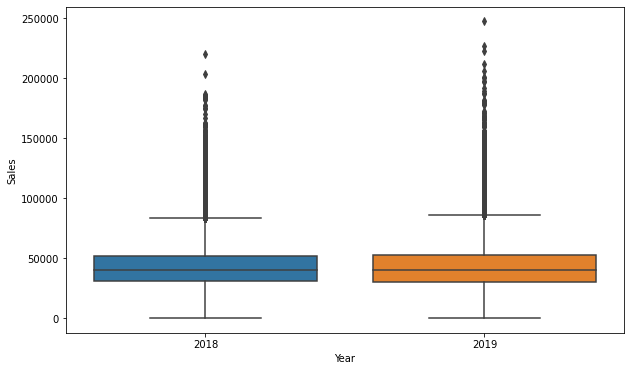

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Year',y='Sales',data=sales_df)
plt.show()

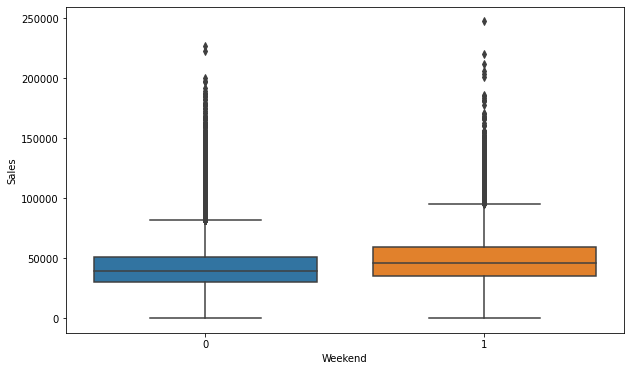

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Weekend',y='Sales',data=sales_df)
plt.show()

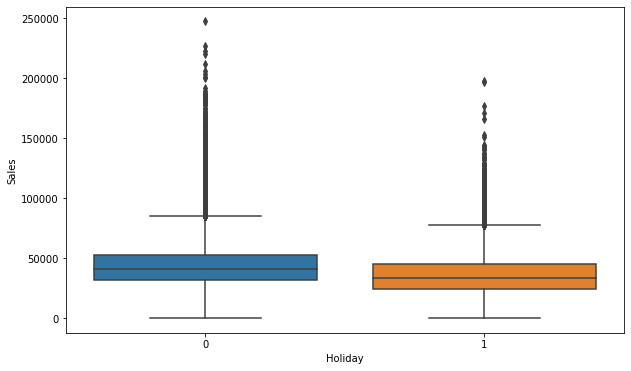

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Holiday',y='Sales',data=sales_df)
plt.show()

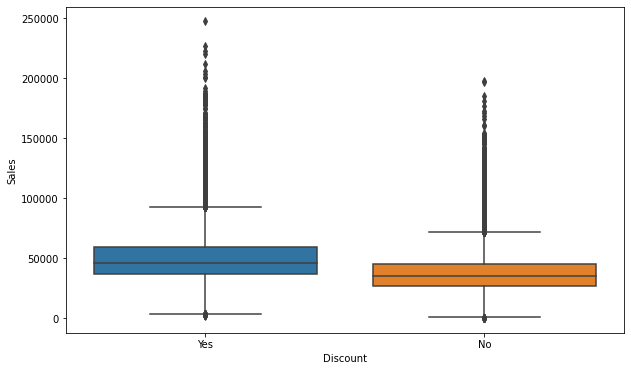

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Discount',y='Sales',data=sales_df)
plt.show()

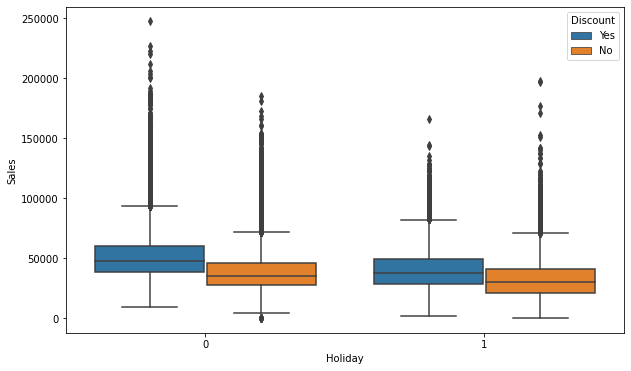

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Holiday',y='Sales', hue='Discount', data=sales_df)
plt.show()

3. Data Preparation

#Dummy Variables

In [23]:
dum_store = pd.get_dummies(sales_df['Store_Type'], prefix='StoreType', drop_first=True)
sales_df = pd.concat([sales_df, dum_store], axis=1)
sales_df = sales_df.drop('Store_Type', 1)


In [24]:
dum_location = pd.get_dummies(sales_df['Location_Type'], prefix='LocationType', drop_first=True)
sales_df = pd.concat([sales_df, dum_location], axis=1)
sales_df = sales_df.drop('Location_Type', 1)


In [25]:
dum_region = pd.get_dummies(sales_df['Region_Code'], prefix='RegionCode', drop_first=True)
sales_df = pd.concat([sales_df, dum_region], axis=1)
sales_df = sales_df.drop('Region_Code', 1)


In [26]:
sales_df = sales_df.drop(['Date', 'Day','Month','Year'], 1)

In [27]:
sales_df['Discount'] = sales_df['Discount'].map({'Yes':1, 'No':0})

In [28]:
sales_df.head()

,ID,Store_id,Holiday,Discount,#Order,Sales,Weekend,StoreType_S2,StoreType_S3,StoreType_S4,LocationType_L2,LocationType_L3,LocationType_L4,LocationType_L5,RegionCode_R2,RegionCode_R3,RegionCode_R4
0,T1000001,1,1,1,9,7011.84,0,0,0,0,0,1,0,0,0,0,0
1,T1000002,253,1,1,60,51789.12,0,0,0,1,1,0,0,0,0,0,0
2,T1000003,252,1,1,42,36868.20,0,0,1,0,1,0,0,0,0,0,0
3,T1000004,251,1,1,23,19715.16,0,1,0,0,0,1,0,0,0,0,0
4,T1000005,250,1,1,62,45614.52,0,1,0,0,0,1,0,0,0,0,1


In [29]:
sales_df = sales_df.drop(['ID','Store_id','#Order'], 1)

In [30]:
sales_df.head()

,Holiday,Discount,Sales,Weekend,StoreType_S2,StoreType_S3,StoreType_S4,LocationType_L2,LocationType_L3,LocationType_L4,LocationType_L5,RegionCode_R2,RegionCode_R3,RegionCode_R4
0,1,1,7011.84,0,0,0,0,0,1,0,0,0,0,0
1,1,1,51789.12,0,0,0,1,1,0,0,0,0,0,0
2,1,1,36868.20,0,0,1,0,1,0,0,0,0,0,0
3,1,1,19715.16,0,1,0,0,0,1,0,0,0,0,0
4,1,1,45614.52,0,1,0,0,0,1,0,0,0,0,1


In [31]:
Scaler = MinMaxScaler()
sales_df['Sales'] = Scaler.fit_transform(sales_df[['Sales']])
sales_df.head()

,Holiday,Discount,Sales,Weekend,StoreType_S2,StoreType_S3,StoreType_S4,LocationType_L2,LocationType_L3,LocationType_L4,LocationType_L5,RegionCode_R2,RegionCode_R3,RegionCode_R4
0,1,1,0.028363,0,0,0,0,0,1,0,0,0,0,0
1,1,1,0.209490,0,0,0,1,1,0,0,0,0,0,0
2,1,1,0.149134,0,0,1,0,1,0,0,0,0,0,0
3,1,1,0.079749,0,1,0,0,0,1,0,0,0,0,0
4,1,1,0.184514,0,1,0,0,0,1,0,0,0,0,1


In [32]:
sales_df.describe()

,Holiday,Discount,Sales,Weekend,StoreType_S2,StoreType_S3,StoreType_S4,LocationType_L2,LocationType_L3,LocationType_L4,LocationType_L5,RegionCode_R2,RegionCode_R3,RegionCode_R4
count,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000,188340.000000
mean,0.131783,0.447536,0.173065,0.141473,0.153425,0.131507,0.243836,0.257534,0.158904,0.057534,0.073973,0.287671,0.235616,0.136986
std,0.338256,0.497241,0.074659,0.348510,0.360397,0.337955,0.429396,0.437277,0.365588,0.232861,0.261727,0.452678,0.424385,0.343834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.123075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.160500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.209975,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


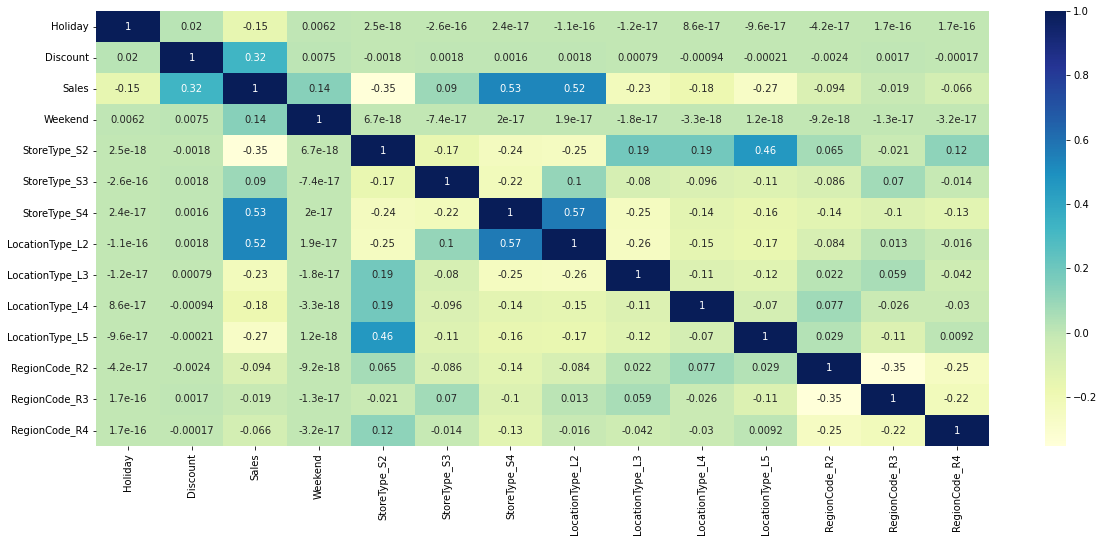

In [33]:
#Correlation Coefficients
plt.figure(figsize=(20,8))
sns.heatmap(sales_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

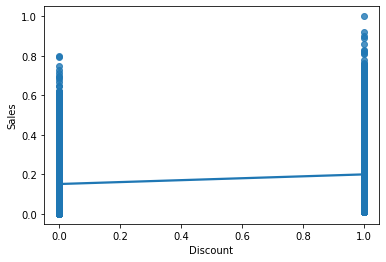

In [34]:
plt.figure()
sns.regplot(x='Discount',y='Sales',data=sales_df)
plt.show()

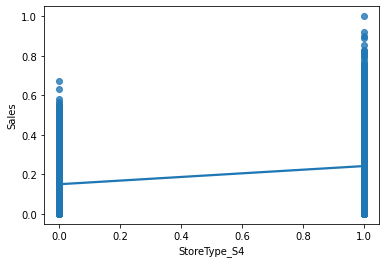

In [35]:
plt.figure()
sns.regplot(x='StoreType_S4',y='Sales',data=sales_df)
plt.show()

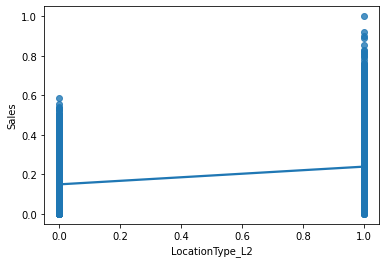

In [36]:
plt.figure()
sns.regplot(x='LocationType_L2',y='Sales',data=sales_df)
plt.show()

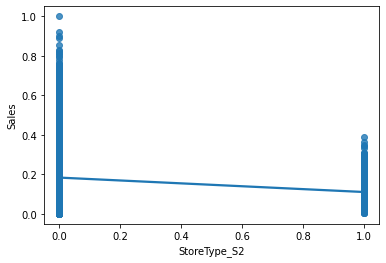

In [37]:
plt.figure()
sns.regplot(x='StoreType_S2',y='Sales',data=sales_df)
plt.show()

4. Splitting Data into Training and Testing Sets

In [38]:
np.random.seed(0)
df_train, df_test = train_test_split(sales_df, train_size=0.7, random_state=100)

In [39]:
df_train.describe()

,Holiday,Discount,Sales,Weekend,StoreType_S2,StoreType_S3,StoreType_S4,LocationType_L2,LocationType_L3,LocationType_L4,LocationType_L5,RegionCode_R2,RegionCode_R3,RegionCode_R4
count,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000,131838.000000
mean,0.131320,0.447026,0.173072,0.142387,0.154053,0.131214,0.244103,0.257172,0.159878,0.057237,0.073818,0.289067,0.234818,0.136994
std,0.337752,0.497188,0.074547,0.349448,0.361001,0.337636,0.429555,0.437076,0.366494,0.232296,0.261475,0.453331,0.423887,0.343842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.123160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.160379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.210008,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X_train = df_train.drop('Sales', 1)
y_train = df_train['Sales']

In [46]:
y_train.head()

22964     0.190741
81316     0.209465
167174    0.112166
162541    0.045094
69960     0.259462
Name: Sales, dtype: float64

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Holiday', True, 1),
 ('Discount', True, 1),
 ('Weekend', True, 1),
 ('StoreType_S2', True, 1),
 ('StoreType_S3', True, 1),
 ('StoreType_S4', True, 1),
 ('LocationType_L2', True, 1),
 ('LocationType_L3', True, 1),
 ('LocationType_L4', True, 1),
 ('LocationType_L5', True, 1),
 ('RegionCode_R2', False, 4),
 ('RegionCode_R3', False, 3),
 ('RegionCode_R4', False, 2)]

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['Holiday', 'Discount', 'Weekend', 'StoreType_S2', 'StoreType_S3',
       'StoreType_S4', 'LocationType_L2', 'LocationType_L3', 'LocationType_L4',
       'LocationType_L5'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['RegionCode_R2', 'RegionCode_R3', 'RegionCode_R4'], dtype='object')

In [51]:
#Building model using statsmodel
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 1.714e+04
Date:                Wed, 13 Oct 2021   Prob (F-statistic):               0.00
Time:                        22:49:45   Log-Likelihood:             2.1013e+05
No. Observations:              131838   AIC:                        -4.202e+05
Df Residuals:                  131827   BIC:                        -4.201e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1353      0.000    4

In [52]:
def vif_fn(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=True)
    return vif

In [53]:
X = X_train_rfe.drop('const', 1)
vif_fn(X)

,Features,VIF
0,Holiday,1.11
2,Weekend,1.12
8,LocationType_L4,1.16
4,StoreType_S3,1.23
7,LocationType_L3,1.28
1,Discount,1.46
9,LocationType_L5,1.49
3,StoreType_S2,1.77
5,StoreType_S4,2.09
6,LocationType_L2,2.16


In [54]:
y_train_sales = lm.predict(X_train_rfe)

<Figure size 432x288 with 0 Axes>

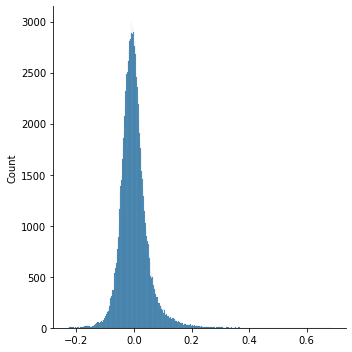

In [55]:
plt.figure()
sns.displot(y_train - y_train_sales)
plt.show()

In [56]:
X_train_new = X_train_rfe.drop('const', 1)

In [58]:
X_test = df_test.drop('Sales', 1)
y_test = df_test['Sales']

In [59]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [60]:
y_pred = lm.predict(X_test_new)

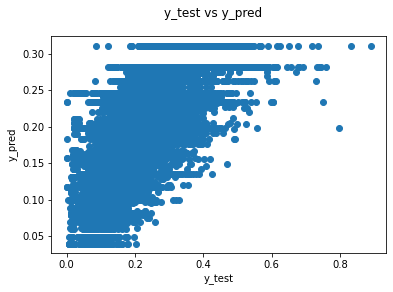

In [61]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [71]:
y_pred.head()

60213     0.203973
167058    0.137786
120401    0.203973
151218    0.079398
45385     0.145849
dtype: float64